<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/tf/horse_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
import zipfile

In [2]:
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip'
file_name = 'horse-or-human.zip'
urllib.request.urlretrieve(url, file_name)

('horse-or-human.zip', <http.client.HTTPMessage at 0x7f5c218fdd30>)

In [3]:
training_dir = 'horse-or-human/training/'
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [4]:
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip'
file_name = 'validation-horse-or-human.zip'
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(url, file_name)
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()


In [5]:
import os

train_horse_dir = f'{training_dir}/horses'
train_human_dir = f'{training_dir}/humans'

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse33-3.png', 'horse41-0.png', 'horse20-7.png', 'horse50-5.png', 'horse38-1.png', 'horse03-2.png', 'horse27-5.png', 'horse17-9.png', 'horse19-2.png', 'horse18-6.png']
['human17-29.png', 'human06-08.png', 'human12-05.png', 'human15-10.png', 'human16-20.png', 'human07-20.png', 'human17-19.png', 'human13-23.png', 'human11-19.png', 'human11-20.png']


In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

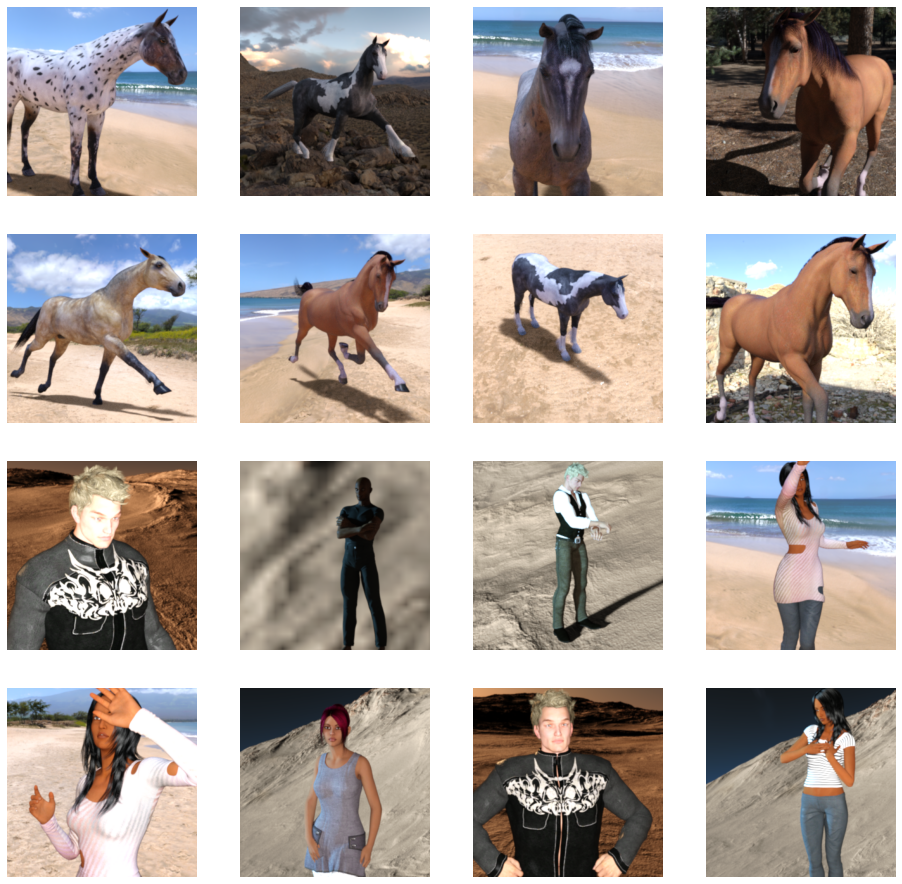

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = Sequential([
  Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
  MaxPooling2D(2, 2),
  Conv2D(32, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [11]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [12]:
history = model.fit(train_generator, epochs=15)

Epoch 1/15
33/33 [==============================] - 8s 231ms/step - loss: 0.8423 - accuracy: 0.6475
Epoch 2/15
33/33 [==============================] - 8s 233ms/step - loss: 0.4093 - accuracy: 0.8462
Epoch 3/15
33/33 [==============================] - 8s 232ms/step - loss: 0.1884 - accuracy: 0.9357
Epoch 4/15
33/33 [==============================] - 8s 230ms/step - loss: 0.1934 - accuracy: 0.9426
Epoch 5/15
33/33 [==============================] - 8s 236ms/step - loss: 0.2087 - accuracy: 0.9834
Epoch 6/15
33/33 [==============================] - 8s 235ms/step - loss: 0.0454 - accuracy: 0.9805
Epoch 7/15
33/33 [==============================] - 8s 235ms/step - loss: 0.0344 - accuracy: 0.9883
Epoch 8/15
33/33 [==============================] - 8s 231ms/step - loss: 0.0767 - accuracy: 0.9757
Epoch 9/15
33/33 [==============================] - 8s 233ms/step - loss: 0.0592 - accuracy: 0.9834
Epoch 10/15
33/33 [==============================] - 8s 231ms/step - loss: 0.0017 - accuracy: 1.0000

In [13]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = train_datagen.flow_from_directory(
  validation_dir,
  target_size=(300, 300),
  class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [14]:
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
33/33 [==============================] - 9s 272ms/step - loss: 2.5940e-05 - accuracy: 1.0000 - val_loss: 2.8781 - val_accuracy: 0.8633
Epoch 2/15
33/33 [==============================] - 9s 266ms/step - loss: 6.9070e-06 - accuracy: 1.0000 - val_loss: 3.4983 - val_accuracy: 0.8594
Epoch 3/15
33/33 [==============================] - 9s 270ms/step - loss: 1.3842e-06 - accuracy: 1.0000 - val_loss: 3.6809 - val_accuracy: 0.8672
Epoch 4/15
33/33 [==============================] - 9s 268ms/step - loss: 0.1025 - accuracy: 0.9932 - val_loss: 4.8748 - val_accuracy: 0.8242
Epoch 5/15
33/33 [==============================] - 9s 266ms/step - loss: 0.0145 - accuracy: 0.9942 - val_loss: 2.5423 - val_accuracy: 0.8711
Epoch 6/15
33/33 [==============================] - 9s 267ms/step - loss: 7.2230e-06 - accuracy: 1.0000 - val_loss: 2.6039 - val_accuracy: 0.8672
Epoch 7/15
33/33 [==============================] - 9s 267ms/step - loss: 3.9431e-06 - accuracy: 1.0000 - val_loss: 2.8165 - val_acc

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

def predict_images(inference_model, width=300, height=300):
  uploaded = files.upload()

  for fn in uploaded.keys():
  
    # predicting images
    path = f'/content/{fn}'
    img = image.load_img(path, target_size=(width, width, height))
    img_arr = image.img_to_array(img)
    x = np.expand_dims(img_arr, axis=0)

    images = np.vstack([x])
    classes = inference_model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
      print(f"{fn} is a human.") # Target image shape: {x.shape}
    else:
      print(f"{fn} is a horse.")

In [16]:
predict_images(model)

MessageError: ignored

In [ ]:
augmented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_generator = augmented_train_datagen.flow_from_directory(
  training_dir,
  target_size=(300, 300),
  class_mode='binary'  
)

In [ ]:
augmented_images_model = tf.keras.models.clone_model(model)
augmented_images_model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
history = augmented_images_model.fit(augmented_generator, epochs=15)

In [ ]:
predict_images(augmented_images_model)

## Visualizing intermediate representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet. 

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3),
    include_top=False,
    weights=None
)
pre_trained_model.load_weights(weights_file)

In [18]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [19]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print(f'last layer output shape: {last_layer.output_shape}')
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [20]:
x = Flatten()(last_output)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

In [21]:
transfer_learning_model = Model(pre_trained_model.input, x)
transfer_learning_model.compile(
    optimizer=RMSprop(lr=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [24]:
train_transfer_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 1027 images belonging to 2 classes.


In [25]:
transfer_learning_model.fit(train_transfer_generator, epochs=15)

Epoch 1/15
52/52 [==============================] - 7s 139ms/step - loss: 0.0246 - accuracy: 0.9854
Epoch 2/15
52/52 [==============================] - 7s 135ms/step - loss: 1.6141e-05 - accuracy: 1.0000
Epoch 3/15
52/52 [==============================] - 7s 136ms/step - loss: 2.2262e-06 - accuracy: 1.0000
Epoch 4/15
52/52 [==============================] - 7s 134ms/step - loss: 2.6211e-07 - accuracy: 1.0000
Epoch 5/15
52/52 [==============================] - 7s 132ms/step - loss: 7.5157e-08 - accuracy: 1.0000
Epoch 6/15
52/52 [==============================] - 7s 134ms/step - loss: 3.3260e-08 - accuracy: 1.0000
Epoch 7/15
52/52 [==============================] - 7s 133ms/step - loss: 2.1171e-08 - accuracy: 1.0000
Epoch 8/15
52/52 [==============================] - 7s 134ms/step - loss: 1.5653e-08 - accuracy: 1.0000
Epoch 9/15
52/52 [==============================] - 7s 136ms/step - loss: 1.2790e-08 - accuracy: 1.0000
Epoch 10/15
52/52 [==============================] - 7s 134ms/step -

In [34]:
predict_images(transfer_learning_model, 150, 150)

Saving Sketchpad.png to Sketchpad.png
[1.]
Sketchpad.png is a human.
